In [6]:
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.autograd import Variable
from random import shuffle

In [7]:
def target(x,y):
    if (x-0.0)*(x-0.0) + (y-0.0)*(y-0.0) < 0.36 or (x-0.5)*(x-0.5) + (y-0.5)*(y-0.5) < 0.25:
        return 1.0
    else:
        return 0.0

In [8]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()     
        self.fc1 = nn.Linear(2, 40) 
        self.fc2 = nn.Linear(40, 40)
        self.fc3 = nn.Linear(40, 1)
        self.out_act = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.out_act(x)
        return x

net = Net()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
lose_func = nn.BCELoss()

In [25]:
x = []
y = []
for i in numpy.linspace(-1.5,1.5,num = 200):
    for j in numpy.linspace(-1.5,1.5,num = 200):
        x = x + [[i,j]]
    
shuffle(x)

for i in x:
    y = y + [[target(i[0],i[1])]]

In [26]:
def draw(x,y, threshold = 1.0):
    blue_x = []
    blue_y = []
    red_x = []
    red_y = []
    for i in range(len(x)):
        if y[i][0] >= threshold:
            blue_x = blue_x + [x[i][0]]
            blue_y = blue_y + [x[i][1]]
        else:
            red_x = red_x + [x[i][0]]
            red_y = red_y + [x[i][1]]
      
    [fig, ax] = plt.subplots()
    plt.scatter(blue_x, blue_y, color='b')
    plt.scatter(red_x, red_y, color='r')

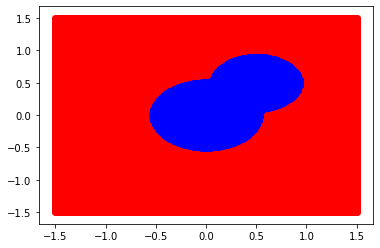

In [27]:
draw(x,y)

In [28]:
x = torch.tensor(x)
y = torch.tensor(y)

In [29]:
def train_epoch(model, opt, criterion, batch_size=50):
    losses = []
    for beg_i in range(0, x.size(0), batch_size):
        x_batch = x[beg_i:beg_i + batch_size, :]
        y_batch = y[beg_i:beg_i + batch_size, :]
        
        opt.zero_grad()
        y_hat = net(x_batch)
        loss = criterion(y_hat, y_batch)
        loss.backward()
        opt.step()        
        losses.append(loss.data.numpy())
    return losses

In [30]:
e_losses = []
num_epochs = 20
for e in range(num_epochs):
    train_epoch(net, opt, lose_func)

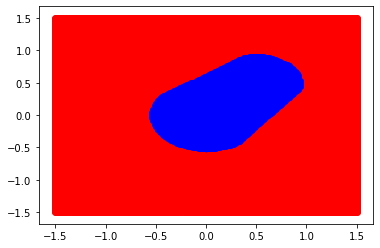

In [32]:
draw(x.tolist(), net(x).tolist(), threshold = 0.5)